In [16]:
%%capture
%pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Exploración del dataset

In [17]:
file = pd.ExcelFile('./homicidios.xlsx')
df = pd.read_excel(file, 'HECHOS')


In [131]:
df.head()


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [107]:
df.shape


(696, 21)

In [108]:
df.columns.to_list()


['ID',
 'N_VICTIMAS',
 'FECHA',
 'AAAA',
 'MM',
 'DD',
 'HORA',
 'HH',
 'LUGAR_DEL_HECHO',
 'TIPO_DE_CALLE',
 'Calle',
 'Altura',
 'Cruce',
 'Dirección Normalizada',
 'COMUNA',
 'XY (CABA)',
 'pos x',
 'pos y',
 'PARTICIPANTES',
 'VICTIMA',
 'ACUSADO']

In [109]:
df.describe().T


,count,mean,min,25%,50%,75%,max,std
N_VICTIMAS,696.0,1.030172,1.0,1.0,1.0,1.0,3.0,0.179393
FECHA,696,2018-09-14 05:12:24.827586048,2016-01-01 00:00:00,2017-04-02 12:00:00,2018-07-12 12:00:00,2020-01-04 06:00:00,2021-12-30 00:00:00,NaN
AAAA,696.0,2018.188218,2016.0,2017.0,2018.0,2020.0,2021.0,1.683754
MM,696.0,6.692529,1.0,4.0,7.0,10.0,12.0,3.571309
DD,696.0,15.936782,1.0,9.0,16.0,23.0,31.0,8.639646
Altura,129.0,3336.635659,30.0,1359.0,2551.0,4500.0,16080.0,3060.641793
COMUNA,696.0,7.425287,0.0,4.0,8.0,11.0,15.0,4.38705


In [110]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Conversión de columnas

In [132]:
df['PARTICIPANTES'] = df['PARTICIPANTES'].astype('category')
df['VICTIMA'] = df['VICTIMA'].astype('category')
df['ACUSADO'] = df['ACUSADO'].astype('category')
df['TIPO_DE_CALLE'] = df['TIPO_DE_CALLE'].astype('category')
df['HH'] = pd.to_numeric(df['HH'], errors='coerce')


In [133]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     695 non-null    float64       
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    category      
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7.0,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Limpieza del dataset
Primero se observan la cantidad de elementos nulos que tenemos en cada columna
En segundo lugar se eliminarán los elementos duplicados

In [134]:
df.isnull().sum()


ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         1
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Se decide eliminar las columnas 'Altura' y 'Cruce' ya que poseen gran cantidad de elementos faltantes y no se consideran de alta relevancia para el análisis

In [135]:
df = df.drop('Altura', axis=1)
df = df.drop('Cruce', axis=1)


A continuacion eliminaremos las columnas que no son relevantes para el análisis

In [136]:
df = df.drop('pos x', axis=1)
df = df.drop('pos y', axis=1)
df = df.drop('XY (CABA)', axis=1)
df = df.drop('Calle', axis=1)
df = df.drop('LUGAR_DEL_HECHO', axis=1)
df = df.drop('Dirección Normalizada', axis=1)


In [137]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             696 non-null    object        
 1   N_VICTIMAS     696 non-null    int64         
 2   FECHA          696 non-null    datetime64[ns]
 3   AAAA           696 non-null    int64         
 4   MM             696 non-null    int64         
 5   DD             696 non-null    int64         
 6   HORA           696 non-null    object        
 7   HH             695 non-null    float64       
 8   TIPO_DE_CALLE  696 non-null    category      
 9   COMUNA         696 non-null    int64         
 10  PARTICIPANTES  696 non-null    category      
 11  VICTIMA        696 non-null    category      
 12  ACUSADO        696 non-null    category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 54.1+ KB


In [138]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Length: 696, dtype: bool

No hay duplicados

Análisis y visualización de datos

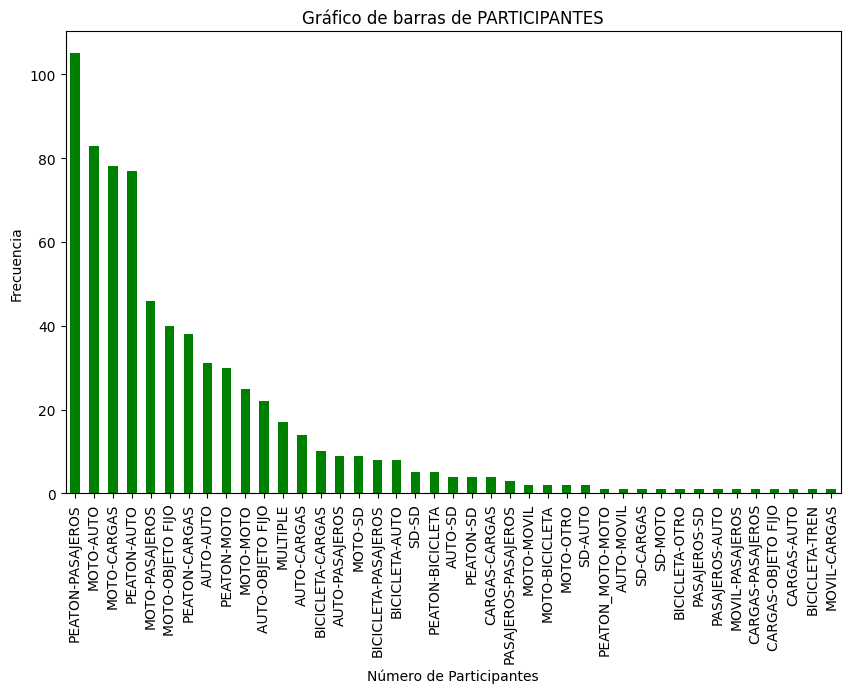

In [139]:
# Gráfico de barras de PARTICIPANTES
plt.figure(figsize=(10, 6))
df['PARTICIPANTES'].value_counts().plot(kind='bar', color='green')
plt.title('Gráfico de barras de PARTICIPANTES')
plt.xlabel('Número de Participantes')
plt.ylabel('Frecuencia')
plt.show()


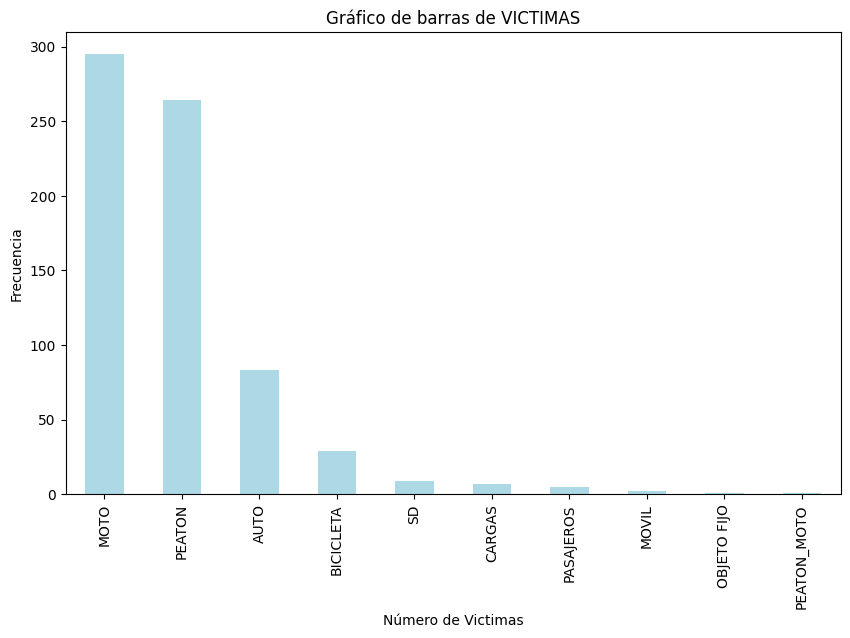

In [140]:
# Gráfico de barras de VICTIMAS
plt.figure(figsize=(10, 6))
df['VICTIMA'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Gráfico de barras de VICTIMAS')
plt.xlabel('Número de Victimas')
plt.ylabel('Frecuencia')
plt.show()


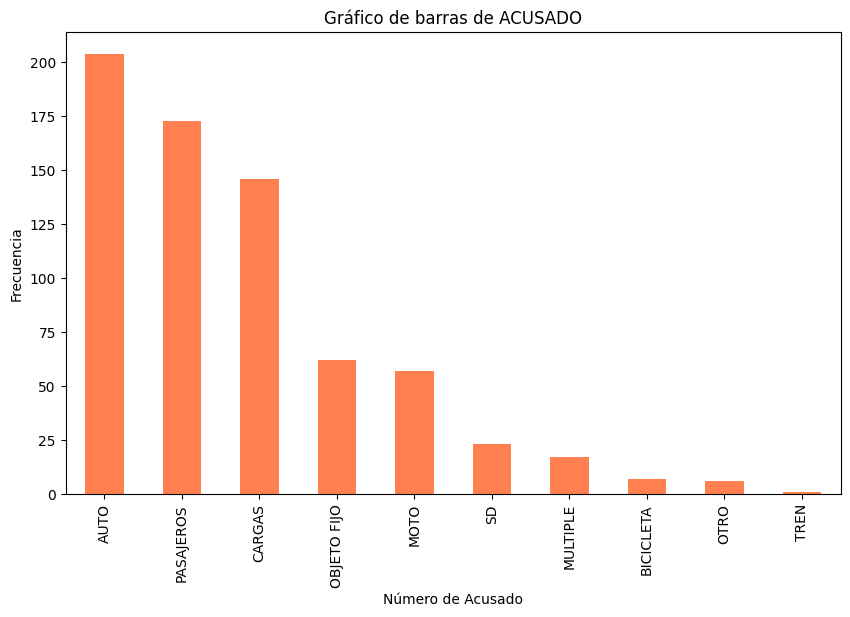

In [141]:
# Gráfico de barras de ACUSADO
plt.figure(figsize=(10, 6))
df['ACUSADO'].value_counts().plot(kind='bar', color='coral')
plt.title('Gráfico de barras de ACUSADO')
plt.xlabel('Número de Acusado')
plt.ylabel('Frecuencia')
plt.show()


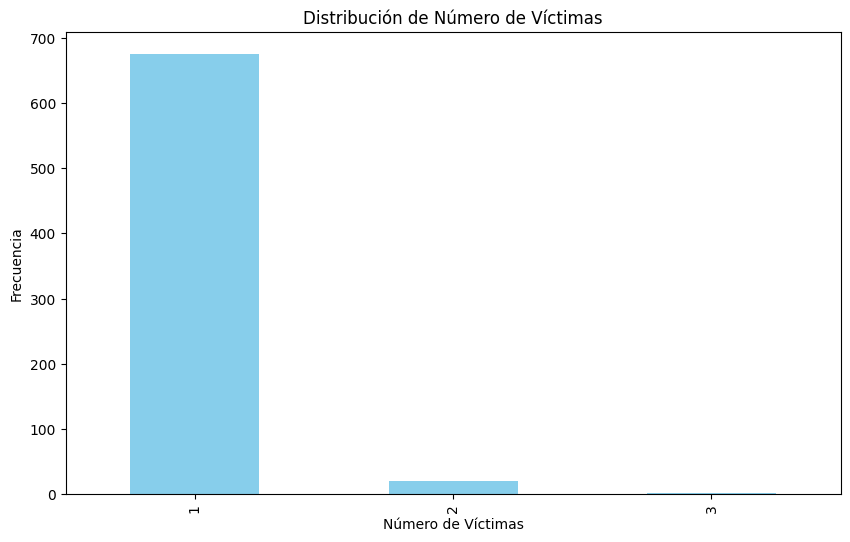

In [142]:
# Distribución de n victimas (Histograma)
plt.figure(figsize=(10, 6))
df['N_VICTIMAS'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Frecuencia')
plt.show()


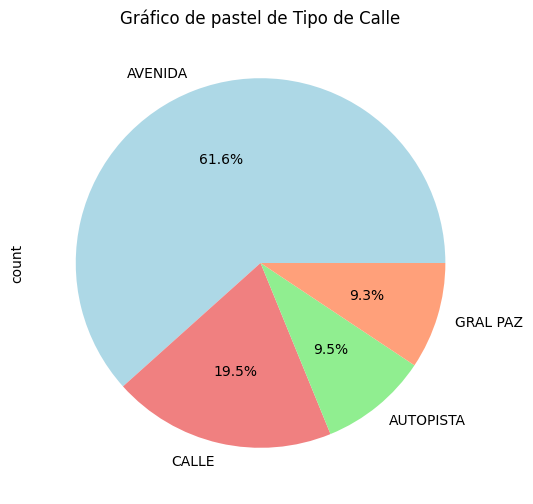

In [143]:
plt.figure(figsize=(10, 6))

colores = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']
df['TIPO_DE_CALLE'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colores)

plt.title('Gráfico de pastel de Tipo de Calle')
plt.show()


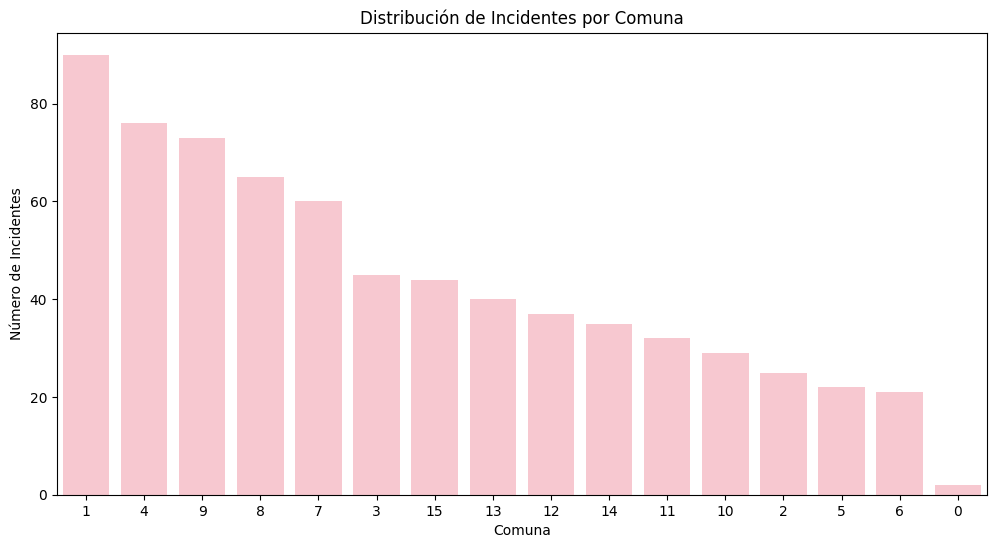

In [144]:
# Distribución de casos por comunas (Gráfico de Barras)
plt.figure(figsize=(12, 6))
sns.countplot(x='COMUNA', data=df, order=df['COMUNA'].value_counts().index, color='pink')
plt.title('Distribución de Incidentes por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Incidentes')
plt.show()


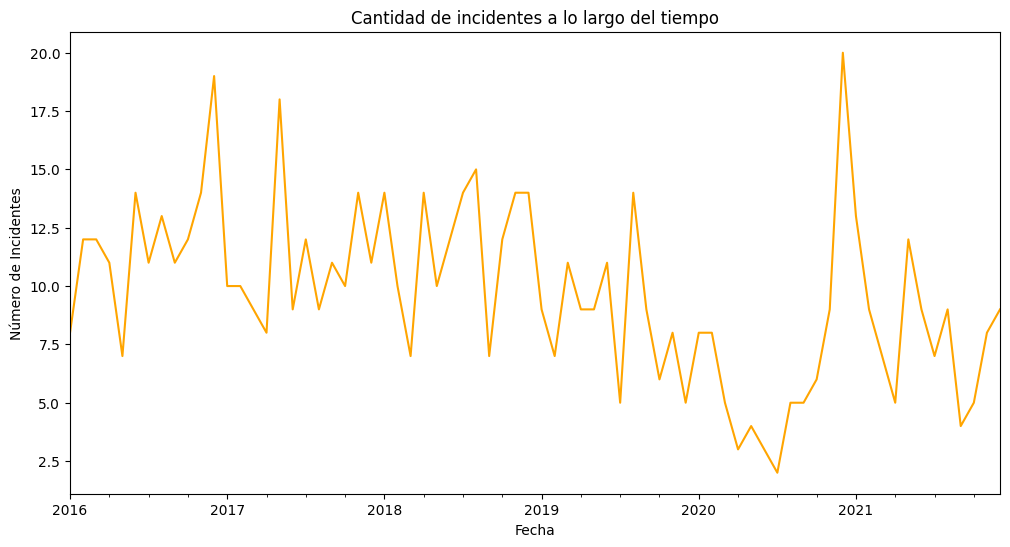

In [145]:
# Análisis temporal (cdad incidentes a lo largo del tiempo)
df['FECHA_MES'] = pd.to_datetime(df['FECHA'])
df.set_index('FECHA', inplace=True)
incidentes_temporales = df.resample('M').size() #Reagrupo por mes
plt.figure(figsize=(12, 6))
incidentes_temporales.plot(title='Cantidad de incidentes a lo largo del tiempo', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Número de Incidentes')
plt.show()


Pico abrupto negativo en el 2020 - COVID

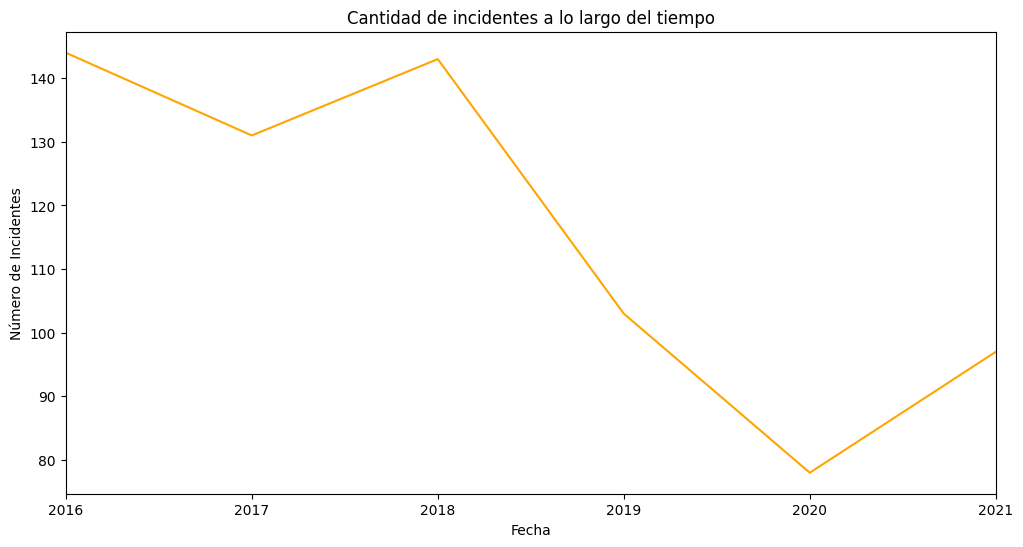

In [146]:
df = pd.read_excel(file, 'HECHOS')
# Análisis temporal (cdad incidentes a lo largo del tiempo)
df['FECHA_ANO'] = pd.to_datetime(df['FECHA'])
df.set_index('FECHA', inplace=True)
incidentes_temporales = df.resample('Y').size() #Reagrupo por mes
plt.figure(figsize=(12, 6))
incidentes_temporales.plot(title='Cantidad de incidentes a lo largo del tiempo', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Número de Incidentes')
plt.show()


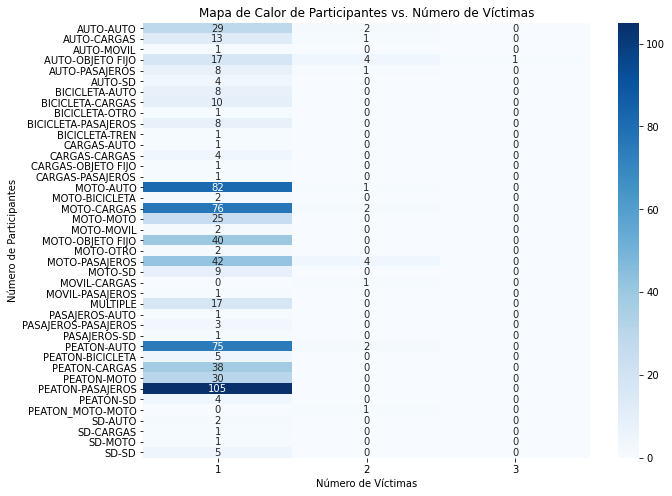

In [22]:
# Mapa de Calor de Participantes vs. Número de Víctimas
plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(df['PARTICIPANTES'], df['N_VICTIMAS']), cmap='Blues', annot=True, fmt='d')
plt.title('Mapa de Calor de Participantes vs. Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Número de Participantes')
plt.show()


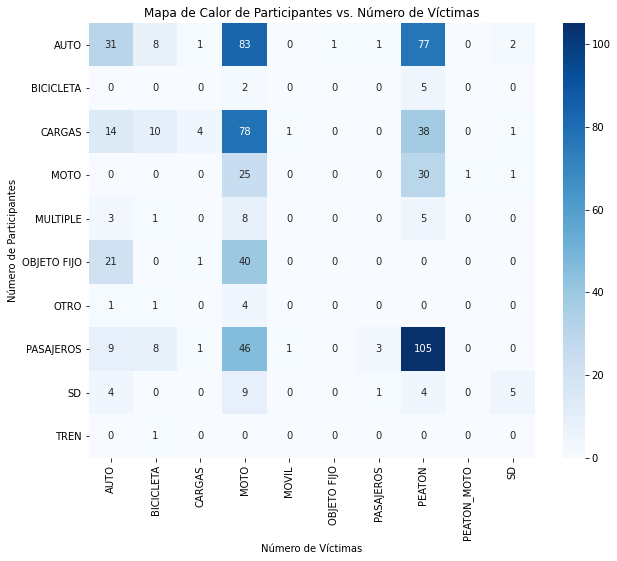

In [25]:
# Mapa de Calor de Participantes vs. Número de Víctimas
plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(df['ACUSADO'], df['VICTIMA']), cmap='Blues', annot=True, fmt='d')
plt.title('Mapa de Calor de Participantes vs. Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Número de Participantes')
plt.show()


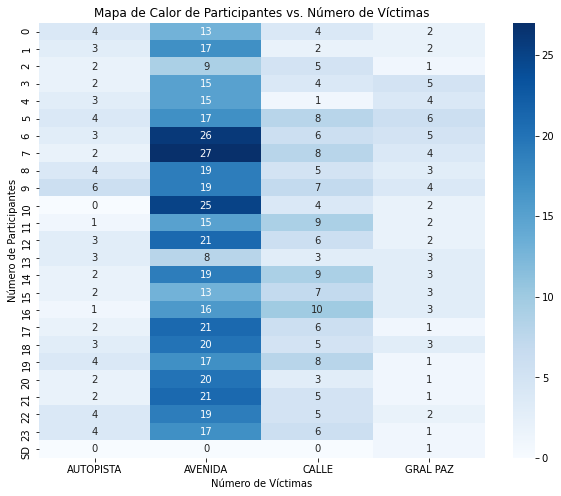

In [26]:
# Mapa de Calor de Participantes vs. Número de Víctimas
plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(df['HH'], df['TIPO_DE_CALLE']), cmap='Blues', annot=True, fmt='d')
plt.title('Mapa de Calor de Participantes vs. Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Número de Participantes')
plt.show()


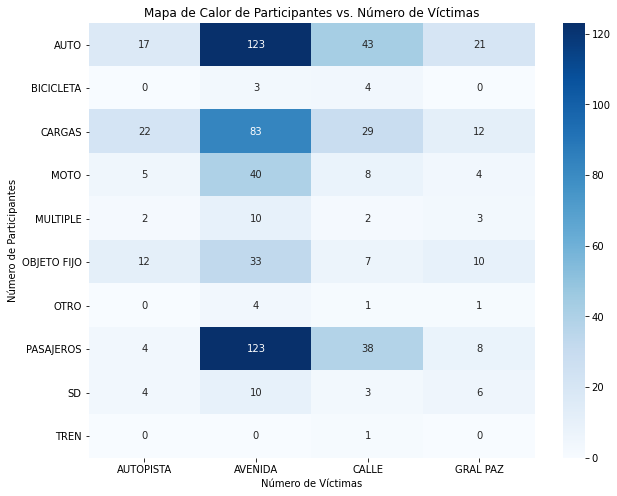

In [24]:
# Mapa de Calor de Participantes vs. Número de Víctimas
plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(df['ACUSADO'], df['TIPO_DE_CALLE']), cmap='Blues', annot=True, fmt='d')
plt.title('Mapa de Calor de Participantes vs. Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Número de Participantes')
plt.show()


In [ ]:
# Mapa de Calor de Participantes vs. Número de Víctimas
plt.figure(figsize=(10, 8))
sns.heatmap(pd.crosstab(df['COMUNA'], df['TIPO_DE_CALLE'], df), cmap='Blues', annot=True, fmt='d')
plt.title('Mapa de Calor de Participantes vs. Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.ylabel('Número de Participantes')
plt.show()


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Madrugada'),
  Text(1, 0, 'Mañana'),
  Text(2, 0, 'Tarde'),
  Text(3, 0, 'Noche')])

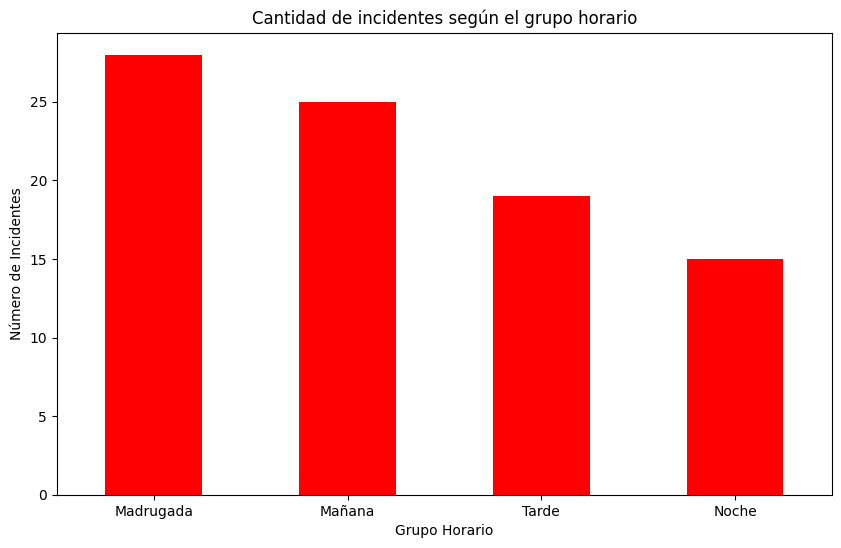

In [151]:
df = pd.read_excel(file, 'HECHOS')

df['HORA'] = pd.to_datetime(df['HORA'], errors='coerce')
df['HORA'] = df['HORA'].apply(lambda x: x.hour if pd.notnull(x) else None)

df['GRUPO_HORARIO'] = pd.cut(df['HORA'],
                             bins=[0, 7, 13, 19, 24],
                             labels=['Madrugada', 'Mañana', 'Tarde', 'Noche'],
                             include_lowest=True)

incidentes_por_horario = df['GRUPO_HORARIO'].value_counts()

plt.figure(figsize=(10, 6))
incidentes_por_horario.sort_index().plot(kind='bar', color='red')

plt.title('Cantidad de incidentes según el grupo horario')
plt.xlabel('Grupo Horario')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=0)


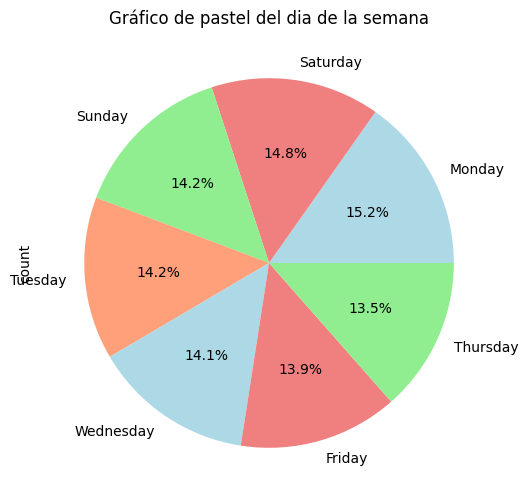

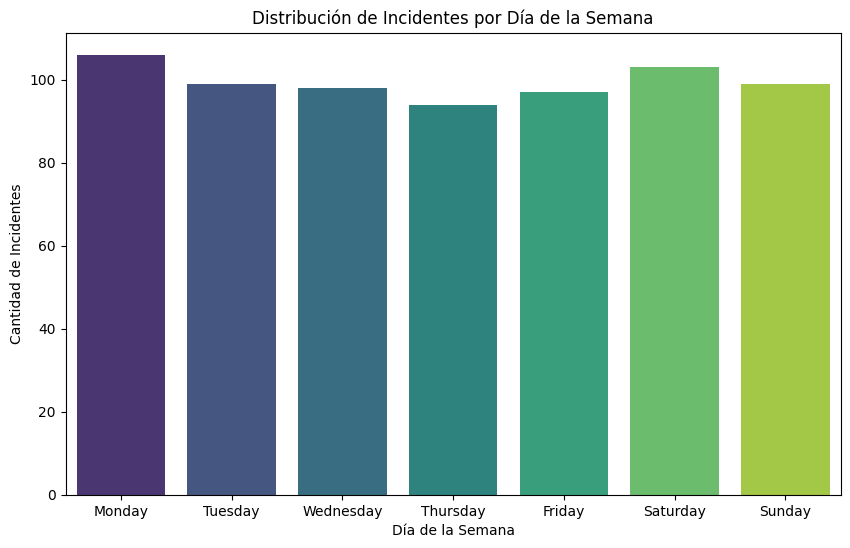

In [ ]:
df = pd.read_excel(file, 'HECHOS')

df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
df['DIA'] = df['FECHA'].dt.day_name()

plt.figure(figsize=(10, 6))

colores = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']
df['DIA'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colores)

plt.title('Gráfico de pastel del dia de la semana')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='DIA', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Distribución de Incidentes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Incidentes')
plt.show()


No hay un dia de la semana que muestre una mayor cantidad de accidentes significativo